In [1]:
from sklearn.linear_model import LogisticRegression
from nltk.classify import SklearnClassifier


In [2]:
import pickle
import numpy as np
import copy

In [3]:
# with open('mnist_temp_act_full1.pkl','rb') as f:
with open('mnist_padded_act_full1.pkl','rb') as f:
    action_records1,labels1 = pickle.load(f)
# with open('mnist_temp_act_full2.pkl','rb') as f:
with open('mnist_padded_act_full2.pkl','rb') as f:
    action_records2,labels2 = pickle.load(f)
action_records   = action_records1 + action_records2

#mnist_boltz1_act_full1  - gamma=0.99 - beta=0.1 speed penalty =0
#mnist_boltz2_act_full1  - gamma=0.99 - beta=1.0 speed penalty =0
#mnist_boltz3_act_full1  - gamma=0.99 - beta=1.0 speed penalty =5 
#mnist_boltz4_act_full1 - gamma=0.99 - beta=0.03 speed penalty =5
#mnist_boltz5_act_full1 - gamma=0.99 - beta=1(orig 0.03) speed penalty =5
#6B -  big actions with penalty 200, gamma=0.99 - beta=1.0 (orig 0.03) speed penalty =0

from mnist import MNIST

mnist = MNIST('/home/bnapp/datasets/mnist/')

_, labels = mnist.load_training()



In [4]:
images, labels = mnist.load_training()


In [5]:
len(action_records)

59904

In [5]:
def prep_n_grams(x,n=None,offsets=None):
    if (n is None) and  not (offsets is None):
        pass
    elif not(n is None) and (offsets is None):
        offsets = list(range(n))
    else:
        error('need to provide either n or offsets')
    ngram_dict = {}
    for ii in range(len(x)-offsets[-1]):
        this_ngram = tuple(x[ii+oo] for oo in offsets)
        if this_ngram in ngram_dict.keys():
            ngram_dict[this_ngram] +=1
        else:
            ngram_dict[this_ngram] = 1
    return ngram_dict

ngram_records=[prep_n_grams(aa,offsets=[0,3,6,9,12]) for aa in action_records]

train_data=[(x,y) for x,y in zip(ngram_records[:3500],labels[:3500])]

classifier = SklearnClassifier(SVC(), sparse=False).train(train_data)

    val_labels=classifier.classify_many(ngram_records[3500:])
    aa=[x==y for x,y in zip(val_labels,labels[3500:])]
    print(np.mean(aa))

In [10]:
# ngram4_records=[prep_n_grams(aa,offsets=[0,2,4,6,8]) for aa in action_records]
classifiers=[]
accu=[]
lagfac = 1
ngram_records=[prep_n_grams(aa[:1000],offsets=[0*lagfac,1*lagfac,2*lagfac,3*lagfac,4*lagfac,5*lagfac,6*lagfac]) for aa in action_records]
#ngram4_records=[prep_n_grams(aa,offsets=[0,2,4,6]) for aa in action_records]
#     print('ngrams:',len(ngram_records))
train_max=55000

train_data4=[(x,y) for x,y in zip(ngram_records[:train_max],labels[:train_max])]
for C in [1, 0.5, 0.1, 0.05]:
    classifier4 = SklearnClassifier(LogisticRegression(C=C,penaltyalty='l1'), sparse=False).train(train_data4)

    val_labels4=classifier4.classify_many(ngram_records[train_max:])
    aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
    print(np.mean(aa))
    accu.append(np.mean(aa))

    train_labels4=classifier4.classify_many(ngram_records[:train_max])
    aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
    print(np.mean(aatr))
    classifiers.append(classifier4)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7934339314845025
0.8934727272727273


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8028140293637847
0.8701090909090909


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.808115823817292
0.8160909090909091


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7985318107667211
0.7938545454545455


In [12]:
classifiers[-1]

<SklearnClassifier(LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))>

In [13]:
cl=classifiers[-1]

In [16]:
np.shape(cl._clf.coef_)

(10, 12444)

In [17]:
np.max(np.abs(classifiers[0]._clf.coef_-classifiers[1]._clf.coef_))

4.0358052351619405

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


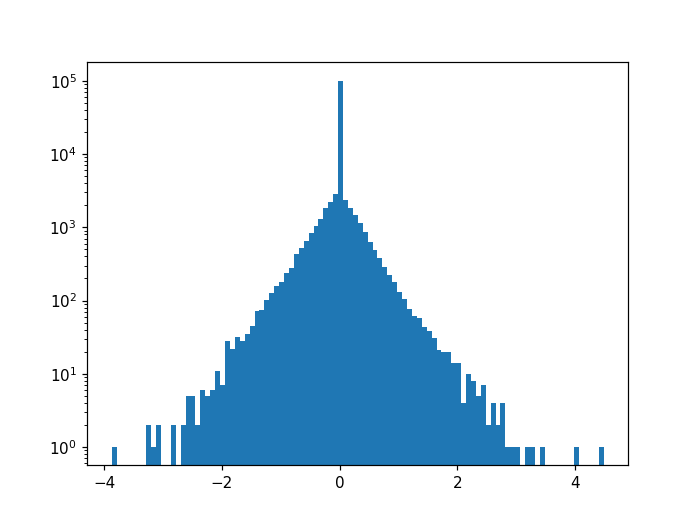

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        5.00000e+00, 5.00000e+00, 2.00000e+00, 6.00000e+00, 5.00000e+00,
        6.00000e+00, 1.10000e+01, 7.00000e+00, 2.80000e+01, 2.20000e+01,
        3.20000e+01, 2.80000e+01, 3.50000e+01, 4.50000e+01, 7.30000e+01,
        7.40000e+01, 1.02000e+02, 1.28000e+02, 1.58000e+02, 1.78000e+02,
        2.40000e+02, 2.77000e+02, 4.29000e+02, 5.14000e+02, 6.41000e+02,
        8.24000e+02, 1.05000e+03, 1.31400e+03, 1.82600e+03, 2.22400e+03,
        2.82800e+03, 1.00765e+05, 2.34100e+03, 1.85700e+03, 1.47000e+03,
        1.13800e+03, 8.68000e+02, 6.22000e+02, 4.97000e+02, 3.82000e+02,
        2.91000e+02, 2.20000e+02, 1.77000e+02, 1.32000e+02, 1.04000e+02,
        7.60000e+01, 6.10000e+01, 5.70000e+01, 4.30000e+01, 3.80000e+01,
        3.10000e+01, 2.10000e+01, 2.00000e+01, 2.00

In [26]:
plt.figure()
plt.hist(classifiers[0]._clf.coef_.reshape([-1]),bins=100,log=True)

<IPython.core.display.Javascript object>


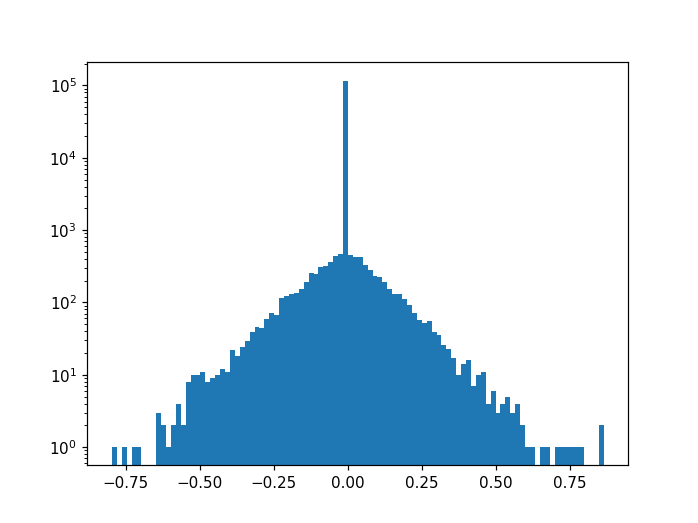

(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00000e+00,
        8.00000e+00, 1.00000e+01, 1.00000e+01, 1.10000e+01, 8.00000e+00,
        9.00000e+00, 1.00000e+01, 1.20000e+01, 1.10000e+01, 2.20000e+01,
        1.80000e+01, 2.40000e+01, 2.90000e+01, 3.90000e+01, 4.60000e+01,
        4.40000e+01, 5.90000e+01, 7.10000e+01, 6.60000e+01, 1.15000e+02,
        1.21000e+02, 1.30000e+02, 1.37000e+02, 1.52000e+02, 1.92000e+02,
        2.54000e+02, 2.45000e+02, 3.08000e+02, 3.24000e+02, 3.68000e+02,
        4.37000e+02, 4.72000e+02, 1.16995e+05, 4.57000e+02, 4.31000e+02,
        4.19000e+02, 3.25000e+02, 2.80000e+02, 2.34000e+02, 2.24000e+02,
        1.89000e+02, 1.55000e+02, 1.29000e+02, 1.31000e+02, 1.10000e+02,
        9.30000e+01, 7.10000e+01, 5.70000e+01, 5.20000e+01, 5.60000e+01,
        3.90000e+01, 3.60000e+01, 2.60000e+01, 2.30

In [51]:
plt.figure()
plt.hist(classifiers[-2]._clf.coef_.reshape([-1]),bins=100,log=True)

<IPython.core.display.Javascript object>


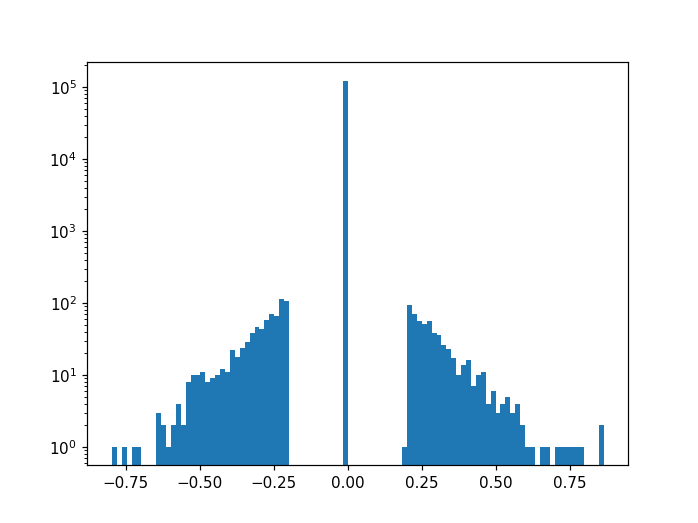

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        8.0000e+00, 1.0000e+01, 1.0000e+01, 1.1000e+01, 8.0000e+00,
        9.0000e+00, 1.0000e+01, 1.2000e+01, 1.1000e+01, 2.2000e+01,
        1.8000e+01, 2.4000e+01, 2.9000e+01, 3.9000e+01, 4.6000e+01,
        4.4000e+01, 5.9000e+01, 7.1000e+01, 6.6000e+01, 1.1500e+02,
        1.0800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2311e+05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        9.3000e+01, 7.1000e+01, 5.7000e+01, 5.2000e+01, 5.6000e+01,
        3.9000e+01, 3.6000e+01, 2.6000e+01, 2.3000e+01, 1.7000e+01,
        1.0000e+01, 1.4000e+01, 1.6000e+01, 7.00

In [52]:
plt.figure()
plt.hist(cl_games1._clf.coef_.reshape([-1]),bins=100,log=True)

In [28]:
ngram_full={}
for rec in ngram_records:
    for zz in rec.keys():
        if not(zz in ngram_full.keys()):
            ngram_full[zz]=rec[zz]
        else:
            ngram_full[zz]+=rec[zz]

<IPython.core.display.Javascript object>


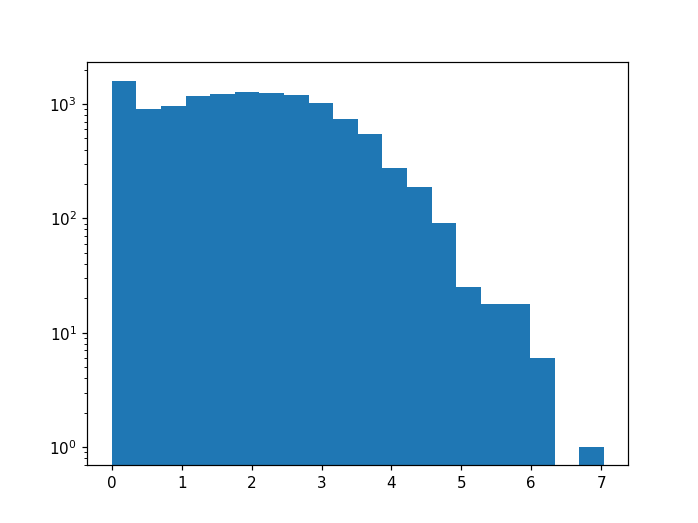

(array([1.605e+03, 8.970e+02, 9.700e+02, 1.179e+03, 1.213e+03, 1.285e+03,
        1.254e+03, 1.193e+03, 1.017e+03, 7.390e+02, 5.500e+02, 2.730e+02,
        1.890e+02, 9.100e+01, 2.500e+01, 1.800e+01, 1.800e+01, 6.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.35191433, 0.70382865, 1.05574298, 1.4076573 ,
        1.75957163, 2.11148595, 2.46340028, 2.8153146 , 3.16722893,
        3.51914325, 3.87105758, 4.2229719 , 4.57488623, 4.92680055,
        5.27871488, 5.6306292 , 5.98254353, 6.33445785, 6.68637218,
        7.03828651]),
 <a list of 20 Patch objects>)

In [29]:
plt.figure()
plt.hist(np.log10([uu for uu in ngram_full.values()]),log=True,bins=20)

In [30]:
    val_labels4=classifiers[-1].classify_many(ngram_records[train_max:])
    aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
    print(np.mean(aa))
    accu.append(np.mean(aa))

0.7985318107667211


In [43]:
cl_games1=copy.deepcopy(classifiers[-2])

In [69]:
cl_games1._clf.coef_=classifiers[-2]._clf.coef_*(np.abs(classifiers[-2]._clf.coef_)>0.0001)

In [70]:
    val_labels4=cl_games1.classify_many(ngram_records[train_max:])
    aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
    print(np.mean(aa))


0.808115823817292


In [84]:
for th in [1e-5,1e-4,1e-3,3e-3,0.01,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    cl_games1._clf.coef_=classifiers[-2]._clf.coef_*(np.abs(classifiers[-2]._clf.coef_)<th)  
    val_labels4=cl_games1.classify_many(ngram_records[train_max:])
    aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
    ignored_features=np.mean(np.sum(np.abs(cl_games1._clf.coef_),axis=0)==0.0)
    print('wights less than:', th,'ignored_features [frac]:' ,ignored_features,'    validation accuracy:', np.mean(aa))


wights less than: 1e-05 ignored_features [frac]: 0.9999196399871424     validation accuracy: 0.10114192495921696
wights less than: 0.0001 ignored_features [frac]: 0.9992767598842816     validation accuracy: 0.07279771615008157
wights less than: 0.001 ignored_features [frac]: 0.9959016393442623     validation accuracy: 0.16190864600326263
wights less than: 0.003 ignored_features [frac]: 0.9885085181613629     validation accuracy: 0.09787928221859707
wights less than: 0.01 ignored_features [frac]: 0.961828993892639     validation accuracy: 0.09747145187601958
wights less than: 0.03 ignored_features [frac]: 0.9101575056252009     validation accuracy: 0.1449836867862969
wights less than: 0.1 ignored_features [frac]: 0.8351816136290582     validation accuracy: 0.29995921696574224
wights less than: 0.2 ignored_features [frac]: 0.8056091288974606     validation accuracy: 0.5560766721044046
wights less than: 0.3 ignored_features [frac]: 0.7959659273545484     validation accuracy: 0.78262642740

In [71]:
np.mean(np.abs(classifiers[-2]._clf.coef_)>0.0001)

0.06382192221150755

In [73]:
np.mean(np.abs(classifiers[-2]._clf.coef_)>0.0000000001)

0.06390228222436516

In [74]:
np.mean(np.abs(classifiers[-2]._clf.coef_)==0.0)

0.9360977177756349

In [81]:
np.mean(np.sum(np.abs(classifiers[-2]._clf.coef_),axis=0)<1e-3)

0.7894567663130826

In [85]:
np.shape(classifiers[-2]._clf.coef_)

(10, 12444)

In [89]:
np.shape(cl_games1._vectorizer.feature_names_)

(12444, 7)

In [90]:
cl_games1._vectorizer.feature_names_

[(1, 1, 1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, 4),
 (1, 1, 1, 1, 1, 1, 5),
 (1, 1, 1, 1, 1, 1, 6),
 (1, 1, 1, 1, 1, 4, 1),
 (1, 1, 1, 1, 1, 4, 4),
 (1, 1, 1, 1, 1, 4, 5),
 (1, 1, 1, 1, 1, 4, 6),
 (1, 1, 1, 1, 1, 5, 1),
 (1, 1, 1, 1, 1, 5, 4),
 (1, 1, 1, 1, 1, 5, 5),
 (1, 1, 1, 1, 1, 5, 6),
 (1, 1, 1, 1, 1, 6, 1),
 (1, 1, 1, 1, 1, 6, 4),
 (1, 1, 1, 1, 1, 6, 5),
 (1, 1, 1, 1, 1, 6, 6),
 (1, 1, 1, 1, 4, 1, 1),
 (1, 1, 1, 1, 4, 1, 4),
 (1, 1, 1, 1, 4, 1, 5),
 (1, 1, 1, 1, 4, 1, 6),
 (1, 1, 1, 1, 4, 4, 1),
 (1, 1, 1, 1, 4, 4, 4),
 (1, 1, 1, 1, 4, 4, 5),
 (1, 1, 1, 1, 4, 4, 6),
 (1, 1, 1, 1, 4, 5, 1),
 (1, 1, 1, 1, 4, 5, 4),
 (1, 1, 1, 1, 4, 5, 5),
 (1, 1, 1, 1, 4, 5, 6),
 (1, 1, 1, 1, 4, 6, 1),
 (1, 1, 1, 1, 4, 6, 4),
 (1, 1, 1, 1, 4, 6, 5),
 (1, 1, 1, 1, 4, 6, 6),
 (1, 1, 1, 1, 5, 1, 1),
 (1, 1, 1, 1, 5, 1, 4),
 (1, 1, 1, 1, 5, 1, 5),
 (1, 1, 1, 1, 5, 1, 6),
 (1, 1, 1, 1, 5, 4, 1),
 (1, 1, 1, 1, 5, 4, 4),
 (1, 1, 1, 1, 5, 4, 5),
 (1, 1, 1, 1, 5, 4, 6),
 (1, 1, 1, 1, 5, 5, 1),
 (1, 1, 1, 1, 5,

In [92]:
set(np.reshape(cl_games1._vectorizer.feature_names_,[-1]))

{1, 4, 5, 6}

In [94]:
[uu for uu in ngram_full.values()]

16384

In [107]:
zz=[]
for ii,ff in enumerate(list(np.sum(np.abs(classifiers[-2]._clf.coef_),axis=0)>1e-6)):
    if ff:
        zz.append(ngram_full[cl_games1._vectorizer.feature_names_[ii]])

In [108]:
bins=np.linspace(0,8,20)

<IPython.core.display.Javascript object>


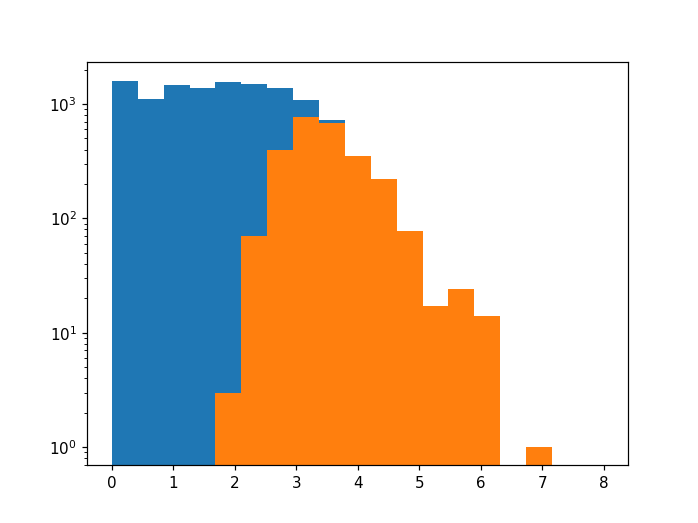

In [110]:
plt.figure()
_=plt.hist(np.log10([uu for uu in ngram_full.values()]),log=True,bins=bins)
_=plt.hist(np.log10(zz),log=True,bins=bins)

In [ ]:
ngram_records_trunc=copy.deepcopy(ngram_records)

In [6]:
def ngram_truncate(ngram_records_trunc,th):
#     ngram_records_trunc=copy.deepcopy(ngram_records)
    for ii,zz in enumerate(ngram_full):
        if ngram_full[zz]<th: 
            for ng in ngram_records_trunc:            
                 ng.pop(zz, None)
        if not ii%100:
            print(ii)
#     return ngram_records_trunc

In [124]:
    ngram_records_trunc=copy.deepcopy(ngram_records)


In [141]:
ngram_truncate(ngram_records_trunc,1000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500


In [142]:
ngram_full2={}
for rec in ngram_records_trunc:
    for zz in rec.keys():
        if not(zz in ngram_full2.keys()):
            ngram_full2[zz]=rec[zz]
        else:
            ngram_full2[zz]+=rec[zz]

In [144]:
train_max=55000

train_data4=[(x,y) for x,y in zip(ngram_records_trunc[:train_max],labels[:train_max])]
classifier4 = SklearnClassifier(LogisticRegression(C=0.1,penalty='l1'), sparse=False).train(train_data4)
val_labels4=classifier4.classify_many(ngram_records_trunc[train_max:])
aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
print(np.mean(aa))
accu.append(np.mean(aa))
train_labels4=classifier4.classify_many(ngram_records_trunc[:train_max])
aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
print(np.mean(aatr))
classifiers.append(classifier4)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8066884176182708
0.8102909090909091


In [143]:
len(ngram_full2)

2367

In [140]:
np.shape(classifier4._clf.coef_)

(10, 5809)

In [11]:
with open('classifiers_temp_n9_l1_sweep_th1000_pp.pkl','rb') as f:
    classifiers=pickle.load(f)

In [10]:
classifiers[0]._clf.coef_.shape

(10, 3949)

In [8]:
len(classifiers[0]._vectorizer.feature_names_[0])

9

In [11]:
np.mean(np.sum(np.abs(classifiers[0]._clf.coef_),axis=0)<1e-3)

0.0002532286654849329

In [12]:
np.mean(np.abs(classifiers[0]._clf.coef_)==0.0)

0.2279057989364396

In [13]:
CC=np.matmul(classifiers[0]._clf.coef_,classifiers[0]._clf.coef_.transpose())

<IPython.core.display.Javascript object>


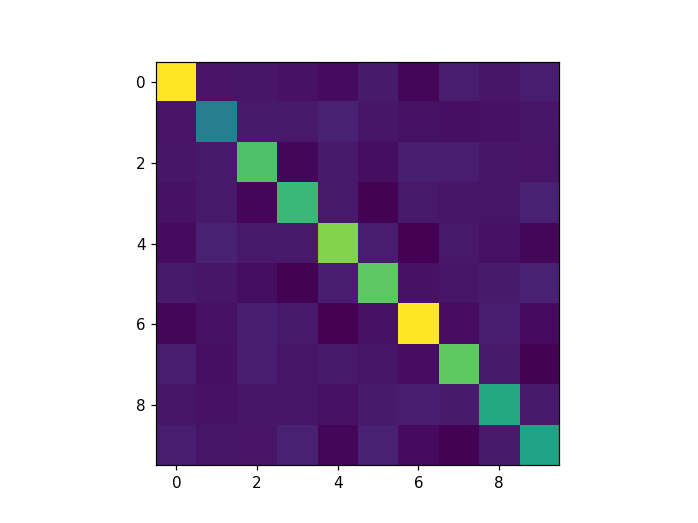

In [17]:
plt.figure()
plt.imshow(CC)

<IPython.core.display.Javascript object>


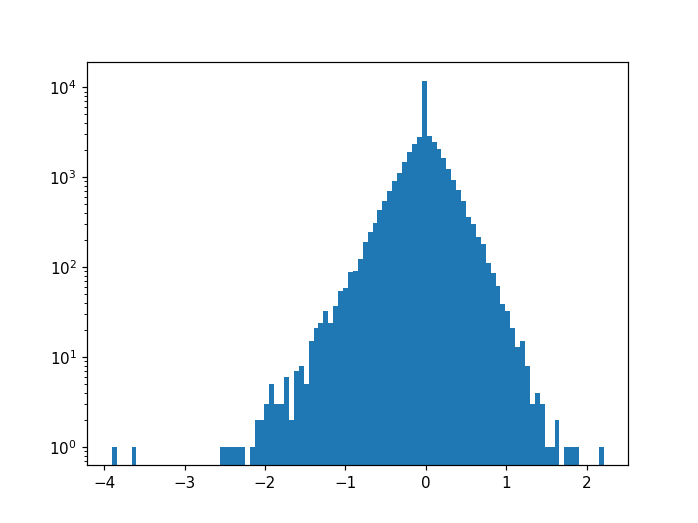

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        6.0000e+00, 2.0000e+00, 7.0000e+00, 8.0000e+00, 5.0000e+00,
        1.5000e+01, 2.1000e+01, 2.4000e+01, 3.3000e+01, 2.4000e+01,
        3.7000e+01, 5.4000e+01, 5.9000e+01, 8.9000e+01, 9.1000e+01,
        1.2300e+02, 1.9300e+02, 2.4600e+02, 3.1300e+02, 4.3300e+02,
        5.4500e+02, 6.9600e+02, 9.0200e+02, 1.1310e+03, 1.4720e+03,
        1.9110e+03, 2.3270e+03, 2.7880e+03, 1.1932e+04, 2.8510e+03,
        2.4760e+03, 2.0530e+03, 1.6530e+03, 1.2500e+03, 9.4500e+02,
        7.3200e+02, 5.4900e+02, 3.6400e+02, 3.01

In [19]:
plt.figure()
plt.hist(classifiers[0]._clf.coef_.reshape([-1]),bins=100,log=True)

<IPython.core.display.Javascript object>


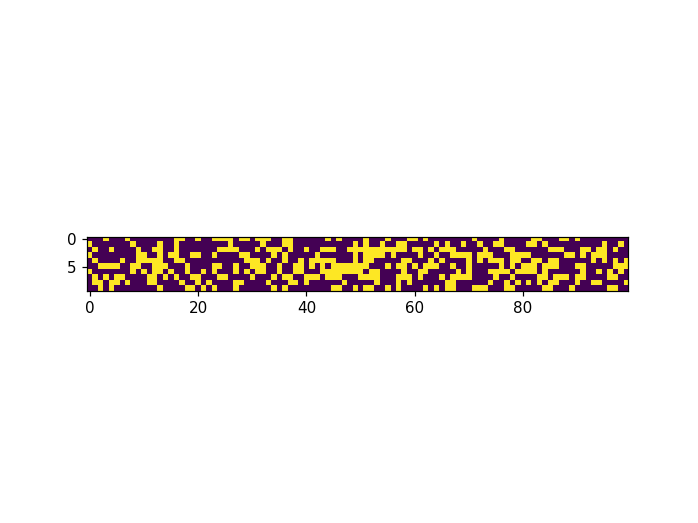

In [25]:
plt.figure()
plt.imshow((classifiers[0]._clf.coef_[:,:100])>0)

In [7]:
def ngram_truncate(ngram_records_trunc,th):
    for ii,zz in enumerate(ngram_full):
        if ngram_full[zz]<th:
            for ng in ngram_records_trunc:
                 ng.pop(zz, None)


In [8]:
offsets= [0, 2, 3, 4, 6, 8, 9, 10, 12]

In [9]:
train_max=55000
ngram_records=[prep_n_grams(aa[:1000],offsets=offsets) for aa in action_records]
train_data4=[(x,y) for x,y in zip(ngram_records[:train_max],labels[:train_max])]

In [10]:
ngram_full={}
for rec in ngram_records:
    for zz in rec.keys():
        if not(zz in ngram_full.keys()):
            ngram_full[zz]=rec[zz]
        else:
            ngram_full[zz]+=rec[zz]


In [42]:
ngram_truncate(ngram_records,1000)

In [45]:
val_labels4=classifiers[-1].classify_many(ngram_records[train_max:])
aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
print(np.mean(aa))
# accu.append(np.mean(aa))

train_labels4=classifiers[-1].classify_many(ngram_records[:train_max])
aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
print(np.mean(aatr))


0.8311582381729201
0.8829272727272728


<IPython.core.display.Javascript object>


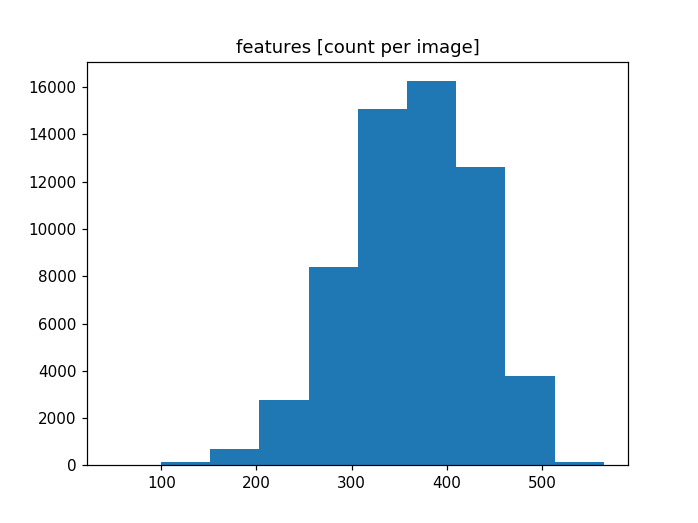

Text(0.5, 1.0, 'features [count per image]')

In [48]:
plt.figure()
_=plt.hist([len(uu) for uu in ngram_records])
plt.title('features [count per image]')

In [49]:
cuts=[50,100,200,300,500,700,1000]
acc_records = []
for cut in cuts:
    ngram_records_cut=[prep_n_grams(aa[:cut],offsets=offsets) for aa in action_records]
    ngram_truncate(ngram_records_cut,1000)
    
    val_labels4=classifiers[-1].classify_many(ngram_records_cut[train_max:])
    aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
    print(np.mean(aa))
    # accu.append(np.mean(aa))

    train_labels4=classifiers[-1].classify_many(ngram_records_cut[:train_max])
    aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
    print(np.mean(aatr))
    acc_records.append([np.mean(aa),np.mean(aatr)])

0.2020799347471452
0.21423636363636364
0.2642740619902121
0.2854181818181818
0.40008156606851547
0.4101090909090909
0.5171288743882545
0.5295272727272727
0.6924959216965743
0.7192545454545455
0.7773246329526917
0.8170545454545455
0.8311582381729201
0.8829272727272728


In [ ]:
##Testing with large (x2) images [original classifier]

In [50]:
# with open('mnist_temp_act_full1.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X56_act_full1.pkl','rb') as f:
    action_records1,labels1 = pickle.load(f)
# with open('mnist_temp_act_full2.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X56_act_full2.pkl','rb') as f:
    action_records2,labels2 = pickle.load(f)
action_records   = action_records1 + action_records2

In [52]:
ngram_records=[prep_n_grams(aa[:1000],offsets=offsets) for aa in action_records]

ngram_truncate(ngram_records,1000)

In [54]:
val_labels4=classifiers[-1].classify_many(ngram_records[train_max:])
aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
print(np.mean(aa))
# accu.append(np.mean(aa))

train_labels4=classifiers[-1].classify_many(ngram_records[:train_max])
aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
print(np.mean(aatr))


0.2801794453507341
0.27196363636363635


In [55]:
# with open('mnist_temp_act_full1.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X42_act_full1.pkl','rb') as f:
    action_records1,labels1 = pickle.load(f)
# with open('mnist_temp_act_full2.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X42_act_full2.pkl','rb') as f:
    action_records2,labels2 = pickle.load(f)
action_records   = action_records1 + action_records2

In [56]:
ngram_records=[prep_n_grams(aa[:1000],offsets=offsets) for aa in action_records]

ngram_truncate(ngram_records,1000)

In [57]:
val_labels4=classifiers[-1].classify_many(ngram_records[train_max:])
aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
print(np.mean(aa))
# accu.append(np.mean(aa))

train_labels4=classifiers[-1].classify_many(ngram_records[:train_max])
aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
print(np.mean(aatr))


0.5316068515497553
0.5078181818181818


In [ ]:
# with open('mnist_temp_act_full1.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X14_act_full1.pkl','rb') as f:
    action_records1,labels1 = pickle.load(f)
# with open('mnist_temp_act_full2.pkl','rb') as f:
with open('mnist_padded_b0p1_v5_X14_act_full2.pkl','rb') as f:
    action_records2,labels2 = pickle.load(f)
action_records   = action_records1 + action_records2
ngram_records=[prep_n_grams(aa[:1000],offsets=offsets) for aa in action_records]

ngram_truncate(ngram_records,1000)

val_labels4=classifiers[-1].classify_many(ngram_records[train_max:])
aa=[x==y for x,y in zip(val_labels4,labels[train_max:])]
print(np.mean(aa))
# accu.append(np.mean(aa))

train_labels4=classifiers[-1].classify_many(ngram_records[:train_max])
aatr=[x==y for x,y in zip(train_labels4,labels[:train_max])]
print(np.mean(aatr))

0.26386623164763456


In [13]:
classifiers[-1]

<SklearnClassifier(LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))>